In [1]:
%matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [9]:
# Find the first and last date in the data set
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"First date: {first_date[0]}, Last date: {last_date[0]}")

First date: 2010-01-01, Last date: 2017-08-23


In [10]:
# Calculate the date 1 year ago from the last data point in the database
formatted_last_date = dt.datetime.strptime(last_date[0], "%Y-%m-%d")
one_year_ago = dt.date(formatted_last_date.year - 1, formatted_last_date.month, formatted_last_date.day)
print(f"The date of one year ago from the last data point in the database:", one_year_ago)

The date of one year ago from the last data point in the database: 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
one_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
                                       filter(Measurement.date >= one_year_ago).all()
one_year_precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_precipitation_df = pd.DataFrame(one_year_precipitation, columns = ["Date", "Precipitation"])
one_year_precipitation_df = one_year_precipitation_df.set_index("Date")
one_year_precipitation_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [13]:
# Sort the dataframe by date
sorted_precipitation_df = one_year_precipitation_df.sort_values("Date", ascending = True)
sorted_precipitation_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


# Use Pandas Plotting with Matplotlib to plot the data

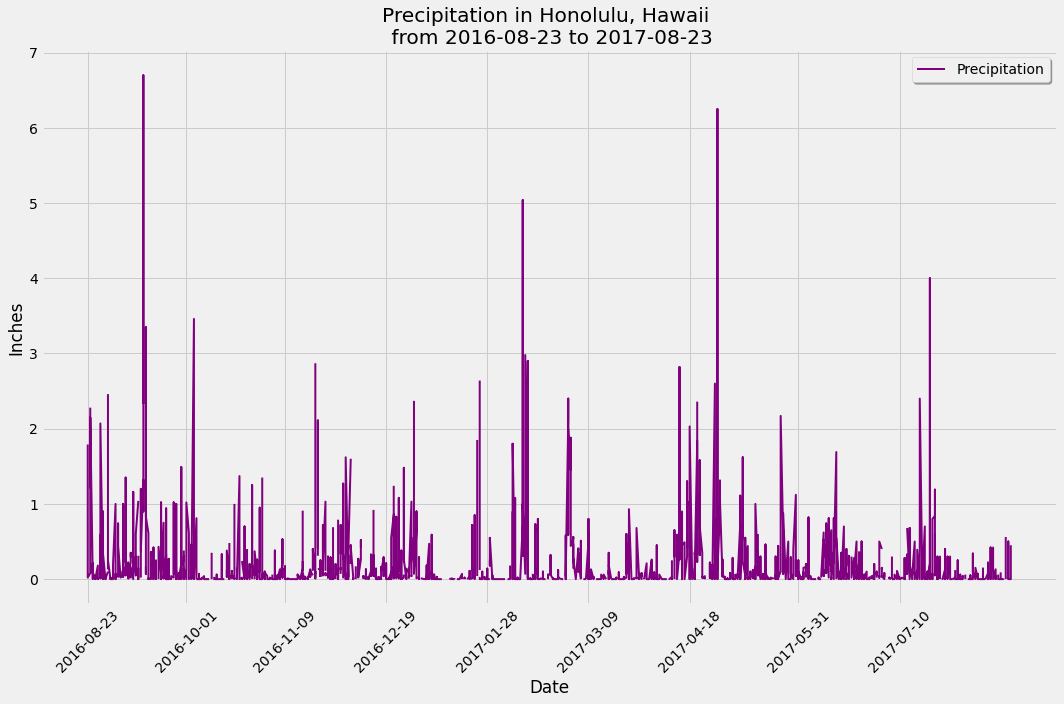

In [14]:
# Set x-axis location
xloc = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"] 

# Plot using pyplot
plt.figure(figsize = (15, 10))
plt.plot(sorted_precipitation_df.index, sorted_precipitation_df["Precipitation"], color = "purple", linewidth = 2)
plt.xticks(xloc, rotation = 45)
plt.title(f"Precipitation in Honolulu, Hawaii \n from {one_year_ago} to {last_date[0]}")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"], loc = "best", shadow = True)
plt.tight_layout()

plt.savefig("result_images/precipitation.PNG")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precipitation_df.describe().round(2)

,Precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


In [16]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).count()
print(f"There is {stations_count} stations at Honolulu, Hawaii.")

There is 9 stations at Honolulu, Hawaii.


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the observations record counts in descending order.
all_stations = session.query(Measurement.station, Station.name,\
                             func.count(Measurement.id)).\
                             filter(Measurement.station == Station.station).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.id).desc()).all()
all_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_record = session.query(Measurement.station, func.min(Measurement.tobs),\
                               func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                               filter(Measurement.station == all_stations[0][0]).all()
most_active_station_record

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [19]:
# Save result to a dataframe
station_record_df = pd.DataFrame(most_active_station_record, columns = ["Station",
                                                                        "Lowest Temp Recorded (F)",
                                                                        "Highest Temp Recorded (F)",
                                                                        "Avg Temp (F)"]).round(1)
station_record_df

,Station,Lowest Temp Recorded (F),Highest Temp Recorded (F),Avg Temp (F)
0,USC00519281,54.0,85.0,71.7


In [20]:
# Choose the station with the highest number of temperature observations.
the_most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.id)).\
                                        filter(Measurement.station == Station.station).\
                                        group_by(Measurement.station).\
                                        order_by(func.count(Measurement.id).desc()).first()

print(f"The highest number of temperature observations (most active) station is:\n{the_most_active_station[1]}")
print(f"Station ID: {the_most_active_station[0]}")
print(f"Recorded {the_most_active_station[2]} records")

The highest number of temperature observations (most active) station is:
WAIHEE 837.5, HI US
Station ID: USC00519281
Recorded 2772 records


In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_results = session.query(Measurement.tobs).\
                                      filter(Measurement.date.between(one_year_ago, last_date[0]),\
                                      Measurement.station == the_most_active_station[0]).all()
twelve_months_results                                      

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

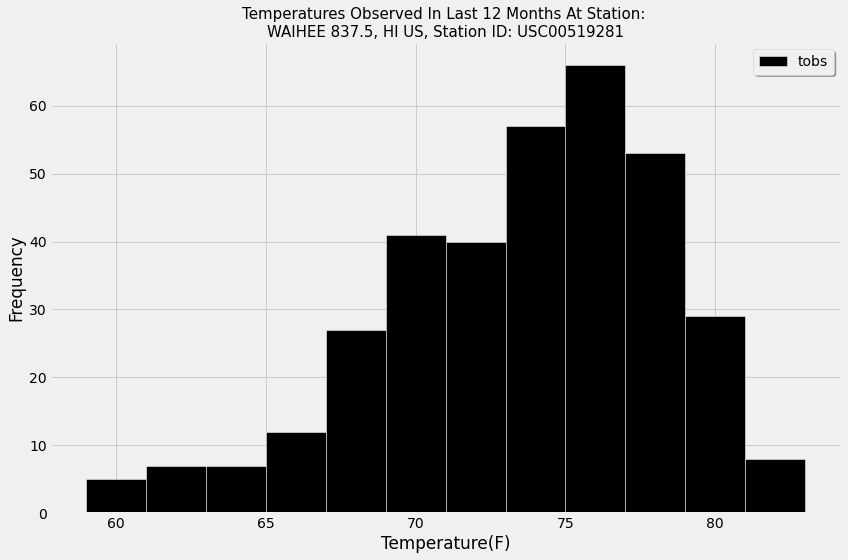

In [22]:
# Plot the results as a histogram
plt.figure(figsize = (12, 8))
plt.hist(np.ravel(twelve_months_results), bins = 12, color = "black", edgecolor = "white")
plt.title(f"Temperatures Observed In Last 12 Months At Station: \n{the_most_active_station[1]}, Station ID: {the_most_active_station[0]}", fontsize = 15)
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.legend(["tobs"], loc = "best", shadow = True)
plt.tight_layout()

plt.savefig("result_images/station-histogram.PNG")
plt.show()

# Bonus Challenge Assignment

## Temperature Analysis I

In [23]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
avg_june_temp = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
                              order_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == "06").all()

# Save June data into DataFrame
avg_june_temp_df = pd.DataFrame(avg_june_temp, columns = ["Station", "Date", "Precipitation", "Temperature"])
avg_june_temp_df

,Station,Date,Precipitation,Temperature
0,USC00511918,2010-06-01,0.00,74.0
1,USC00511918,2010-06-02,0.00,76.0
2,USC00511918,2010-06-03,0.00,78.0
3,USC00511918,2010-06-04,0.00,74.0
4,USC00511918,2010-06-05,0.00,79.0
...,...,...,...,...
1695,USC00519523,2017-06-26,0.00,81.0
1696,USC00519523,2017-06-27,0.00,81.0
1697,USC00519523,2017-06-28,0.00,79.0
1698,USC00519523,2017-06-29,0.00,78.0


In [24]:
# Identify the average temperature in December at all stations across all available years in the dataset. 
avg_dec_temp = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
                             order_by(Measurement.station).filter(func.strftime("%m", Measurement.date) == "12").all()

# Save December data into DataFrame
avg_dec_temp_df = pd.DataFrame(avg_dec_temp, columns = ["Station", "Date", "Precipitation", "Temperature"])
avg_dec_temp_df

,Station,Date,Precipitation,Temperature
0,USC00511918,2010-12-01,0.13,70.0
1,USC00511918,2010-12-02,0.00,74.0
2,USC00511918,2010-12-03,0.01,74.0
3,USC00511918,2010-12-04,0.00,75.0
4,USC00511918,2010-12-05,0.00,69.0
...,...,...,...,...
1512,USC00519523,2016-12-26,0.06,75.0
1513,USC00519523,2016-12-27,0.00,75.0
1514,USC00519523,2016-12-28,0.06,72.0
1515,USC00519523,2016-12-29,0.05,77.0


In [25]:
overall_jun_avg = avg_june_temp_df["Temperature"].mean()
overall_dec_avg = avg_dec_temp_df["Temperature"].mean()

In [26]:
print(f"Average temperature in June across all years from the dataset is: {round(overall_jun_avg, 2)}F.")
print(f"Average temperature in June across all years from the dataset is: {round(overall_dec_avg, 2)}F.")

Average temperature in June across all years from the dataset is: 74.94F.
Average temperature in June across all years from the dataset is: 71.04F.


In [27]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
ttest = ttest_ind(avg_june_temp_df.loc[:, "Temperature"], avg_dec_temp_df.loc[:, "Temperature"], equal_var = False)

In [28]:
# An unpaired t-test was performed because June and December data are distinct.
ttest

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

## Temperature Analysis II
## using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                         filter(Measurement.date >= start_date).\
                         filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Set Start and End date
start_date = "2016-12-25"
end_date = "2017-01-03"

In [31]:
# Dates for analysis
formatted_start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
formatted_end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")

previous_year_start_date = dt.date(formatted_start_date.year - 1, formatted_start_date.month, formatted_start_date.day)
previous_year_end_date = dt.date(formatted_end_date.year - 1, formatted_end_date.month, formatted_end_date.day)
print(f"Trip date starts from {start_date} to {end_date}. \nThus dates to analyze from {previous_year_start_date} to {previous_year_end_date}.")

Trip date starts from 2016-12-25 to 2017-01-03. 
Thus dates to analyze from 2015-12-25 to 2016-01-03.


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates. 
estimated_trip_temp = calc_temps(previous_year_start_date, previous_year_end_date)
estimated_trip_temp

[(62.0, 71.70175438596492, 79.0)]

# Plot the results from your previous query as a bar chart. 

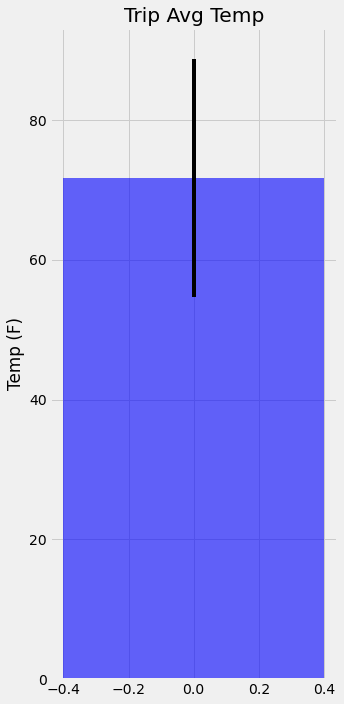

In [33]:
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = estimated_trip_temp[0][0]
avg_temp = estimated_trip_temp[0][1]
max_temp = estimated_trip_temp[0][2]
plt.figure(figsize = (5, 10))
plt.bar(0, avg_temp, yerr = [max_temp - min_temp], color = "blue", alpha = 0.6)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()

plt.savefig("result_images/temperature.PNG")
plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_by_st = (session.query(Measurement.station,Station.name,func.sum(Measurement.prcp),
                                      Station.latitude,Station.longitude,Station.elevation).\
                                      filter(Measurement.date >= previous_year_start_date).\
                                      filter(Measurement.date <= previous_year_end_date).\
                                      filter(Measurement.station == Station.station).\
                                      group_by(Measurement.station).\
                                      order_by(func.sum(Measurement.prcp).desc()).all())

print(f"Daily total rainfall by station for dates between {previous_year_start_date} and {previous_year_end_date}.")
total_rainfall_by_st_df = pd.DataFrame(total_rainfall_by_st, columns = ["Station",
                                                                        "Station Name",
                                                                        "Total Rainfall (inch)",
                                                                        "Latitude",
                                                                        "Longitude",
                                                                        "Elevation"])
total_rainfall_by_st_df

Daily total rainfall by station for dates between 2015-12-25 and 2016-01-03.


,Station,Station Name,Total Rainfall (inch),Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",4.47,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",2.29,21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",1.59,21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",1.05,21.33556,-157.71139,19.5
4,USC00519397,"WAIKIKI 717.2, HI US",0.46,21.27160,-157.81680,3.0
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.27,21.52130,-157.83740,7.0
6,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

# Calculate the daily normals for your trip

In [36]:
# Set the start and end date of the trip
start_date = "2016-12-25"
end_date = "2017-01-03"
print(f"Holiday starts from {start_date} to {end_date}.")

Holiday starts from 2016-12-25 to 2017-01-03.


In [37]:
# Dates for analysis
formatted_start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
formatted_end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")

previous_year_start_date = dt.date(formatted_start_date.year - 1, formatted_start_date.month, formatted_start_date.day)
previous_year_end_date = dt.date(formatted_end_date.year - 1, formatted_end_date.month, formatted_end_date.day)
print(previous_year_start_date)
print(previous_year_end_date)

2015-12-25
2016-01-03


In [38]:
# Use the start and end date to create a range of dates
trip_dates_list = pd.date_range(previous_year_start_date, periods = 10).tolist()
trip_dates_list

[Timestamp('2015-12-25 00:00:00', freq='D'),
 Timestamp('2015-12-26 00:00:00', freq='D'),
 Timestamp('2015-12-27 00:00:00', freq='D'),
 Timestamp('2015-12-28 00:00:00', freq='D'),
 Timestamp('2015-12-29 00:00:00', freq='D'),
 Timestamp('2015-12-30 00:00:00', freq='D'),
 Timestamp('2015-12-31 00:00:00', freq='D'),
 Timestamp('2016-01-01 00:00:00', freq='D'),
 Timestamp('2016-01-02 00:00:00', freq='D'),
 Timestamp('2016-01-03 00:00:00', freq='D')]

In [39]:
# Stip off the year and save a list of %m-%d strings
new_trip_dates_list = []
for date in trip_dates_list:
    new_trip_dates_list.append(dt.datetime.strftime(date, "%m-%d"))
new_trip_dates_list

['12-25',
 '12-26',
 '12-27',
 '12-28',
 '12-29',
 '12-30',
 '12-31',
 '01-01',
 '01-02',
 '01-03']

In [40]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# push each tuple of calculations into a list called `normals`
normals = []
for date in new_trip_dates_list:
    normals.append(daily_normals(date))
normals

[[(60.0, 71.75, 79.0)],
 [(63.0, 71.44680851063829, 77.0)],
 [(62.0, 71.91666666666667, 79.0)],
 [(62.0, 70.52083333333333, 77.0)],
 [(57.0, 70.29166666666667, 78.0)],
 [(63.0, 69.86363636363636, 76.0)],
 [(56.0, 68.27906976744185, 77.0)],
 [(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)]]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_list = []
for normal in normals:
    normal_list.append(np.ravel(normal))
normal_list

[array([60.  , 71.75, 79.  ]),
 array([63.        , 71.44680851, 77.        ]),
 array([62.        , 71.91666667, 79.        ]),
 array([62.        , 70.52083333, 77.        ]),
 array([57.        , 70.29166667, 78.        ]),
 array([63.        , 69.86363636, 76.        ]),
 array([56.        , 68.27906977, 77.        ]),
 array([62.        , 69.15384615, 77.        ]),
 array([60.        , 69.39622642, 77.        ]),
 array([62.        , 68.90909091, 77.        ])]

In [42]:
# Save the data to a DataFrame
trip_normals_df = pd.DataFrame(normal_list, columns = ["Lowest Temp",
                                                       "Avg Temp",
                                                       "Higest Temp"], index = new_trip_dates_list)
trip_normals_df.index.name = "Date"
trip_normals_df.round(2)

,Lowest Temp,Avg Temp,Higest Temp
Date,,,
12-25,60.0,71.75,79.0
12-26,63.0,71.45,77.0
12-27,62.0,71.92,79.0
12-28,62.0,70.52,77.0
12-29,57.0,70.29,78.0
12-30,63.0,69.86,76.0
12-31,56.0,68.28,77.0
01-01,62.0,69.15,77.0
01-02,60.0,69.40,77.0


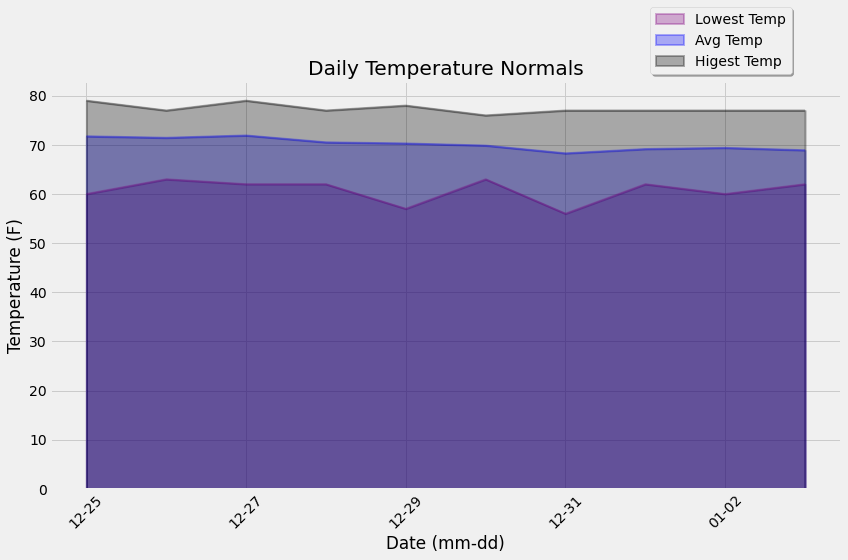

In [43]:
# Plot the daily normals as an area plot with `stacked=False`
plt.rcParams["figure.figsize"] = (12, 8)
colors = ["purple", "blue", "black"]
trip_normals_df.plot(kind = "area", linewidth = 2, stacked = False, rot = 45, alpha = 0.3, color = colors)

plt.title("Daily Temperature Normals")
plt.xlabel("Date (mm-dd)")
plt.ylabel("Temperature (F)")
plt.legend(bbox_to_anchor = (0.75, 1), shadow = True)
plt.tight_layout()

plt.savefig("result_images/daily-normals.PNG")
plt.show()